In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline


In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# After Observing the dimensions of dataset there are 150 instances (rows)
#by 5 attributes (columns)
print(dataset.shape)

(150, 5)


In [4]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
# description(s)
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# class distribution shows each instance has 50 classes
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


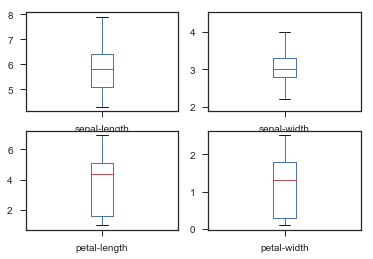

In [7]:
# box and whisker plots to visualize ditribution of input attributes
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

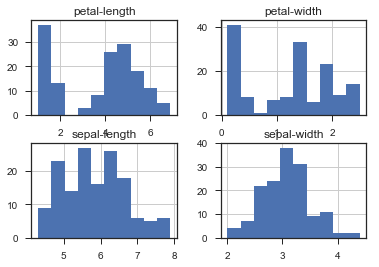

In [8]:
# histogram shows both sepal-length and sepal-width may have guassian distributions
dataset.hist()
plt.show()

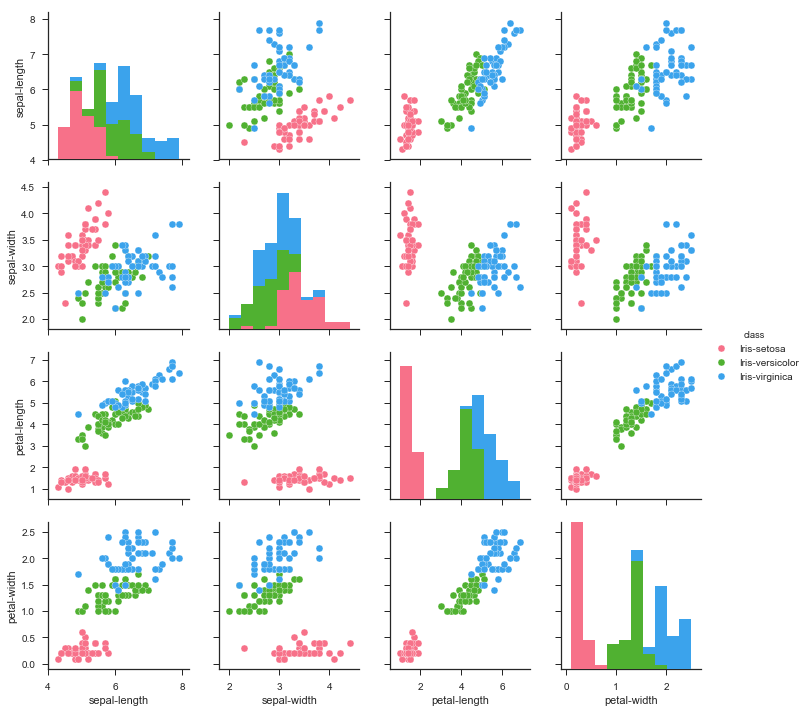

In [9]:
#Scatterplot show interactions between variables. The diaganol grouping of certain 
#pairs of attributes suggest high corelation and predictable relationship.
g = sns.pairplot(dataset, hue="class", palette="husl")


In [10]:
#Create validation dataset
# Split-out validation dataset
array = dataset.values
#index 0-3 of innner array
X = array[:, 0:4]
#Getting labels
Y = array[:, 4]
#Split dataset 80/20
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [11]:
# 10-fold cross validation to estimate accuracy
seed = 7
scoring = 'accuracy'

In [12]:
# Spot check algorithms
models = []
#Simple linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#Nonlinear
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
data = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #fresults[name,cv_results.mean()]
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(names)
#     print(cv_results.mean())
    data.append([name,cv_results.mean()])
#     print(data)
    #print(msg)
#print(data)
df = pandas.DataFrame(data, columns =['Name','Score'])
print(df)
    

   Name     Score
0    LR  0.966667
1   LDA  0.975000
2   KNN  0.983333
3  CART  0.966667
4    NB  0.975000
5   SVM  0.991667


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


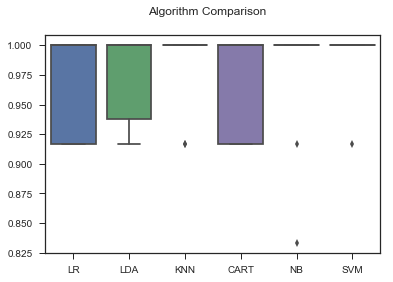

In [13]:
#Compare Algorithms
fig =plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data =results)
ax.set_xticklabels(names)
plt.show()



In [14]:
#SVM is most accurate
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

In [15]:
print(accuracy_score(Y_validation, predictions))

0.9333333333333333


In [16]:
#confusion matrix provides an indication of the errors made
print(confusion_matrix(Y_validation, predictions))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


In [17]:
#classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

